In [1]:
# Code formatting
import jupyter_black
jupyter_black.load()

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from matplotlib.ticker import MultipleLocator

In [4]:
# import os
# os.listdir("Dataset")
# uber_2024 = pd.read_csv("Dataset/ncr_ride_bookings.csv")

# Import dataset from Kaggle - Uber Ride Analytics Dataset 2024

In [5]:
# Install dependencies as needed:
!pip install kagglehub
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "ncr_ride_bookings.csv"

# Load the latest version
uber_2024 = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "yashdevladdha/uber-ride-analytics-dashboard",
    file_path,
    # Provide any additional arguments like
    # sql_query or pandas_kwargs. See the
    # documenation for more information:
    # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

# View the structure of the dataset

In [6]:
uber_2024.shape

(150000, 21)

In [7]:
uber_2024.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [8]:
uber_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [9]:
uber_2024.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


# Data Cleaning

In [10]:
# 1. Check data types
# 2. Check for duplicate values
# 3. Check for missing values

In [11]:
# Check data types

In [12]:
type(uber_2024)

pandas.core.frame.DataFrame

In [13]:
# Check for duplicate values

In [14]:
uber_2024.duplicated().sum()

np.int64(0)

In [15]:
uber_2024.drop_duplicates(inplace=True)

In [16]:
uber_2024.duplicated().sum()

np.int64(0)

In [17]:
# Check for missing values

In [18]:
uber_2024.isnull().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

# Data Analysis
Overview
1. Demand & Booking Performance
    - Monthly Booking Volume Trends
    - Booking Results Distribution (Completed vs Cancelled vs Incomplete)
    - Bookings by Weekday Across Months
    - Hourly Demand Patterns
2. Booking Cancellation Analysis
    - Top cancellation reasons
    - Customer and Driver cancellations
    - Relationship between wait time and cancellations
    - Impact of cancellations on ratings
3. Service Quality Metrics
    - Avg VTAT & CTAT by vehicle type
4. Revenue & Distance Analysis
    - Monthly revenue trend
    - Revenue by vehicle type
    - High-value ride segments
    - Relationship between ride distance and booking value
5. Payment Behavior 
    - Payment preference distribution
    - Cancellation rate by payment type




## Section 1. Demand & Booking Performance
   - Booking Results Distribution (Completed vs Cancelled vs Incomplete)
   - Monthly Booking Volume Trends
   - Bookings by Weekday Across Months
   - Hourly Demand Patterns

# 1.1 Monthly Booking Volume Trends
Overview: 

In [19]:
uber_2024["Date"] = pd.to_datetime(uber_2024["Date"])
uber_2024["Month"] = uber_2024["Date"].dt.month_name()
uber_2024["Weekday"] = uber_2024["Date"].dt.day_name()
uber_2024["Time"] = pd.to_datetime(uber_2024["Time"], format="%H:%M:%S")
uber_2024["Hour"] = uber_2024["Time"].dt.hour

In [20]:
# Define month order
month_order = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]

In [21]:
# Set categorical order
uber_2024["Month"] = pd.Categorical(
    uber_2024["Month"], categories=month_order, ordered=True
)

In [22]:
monthly_booking_counts = uber_2024["Month"].value_counts().reindex(month_order)

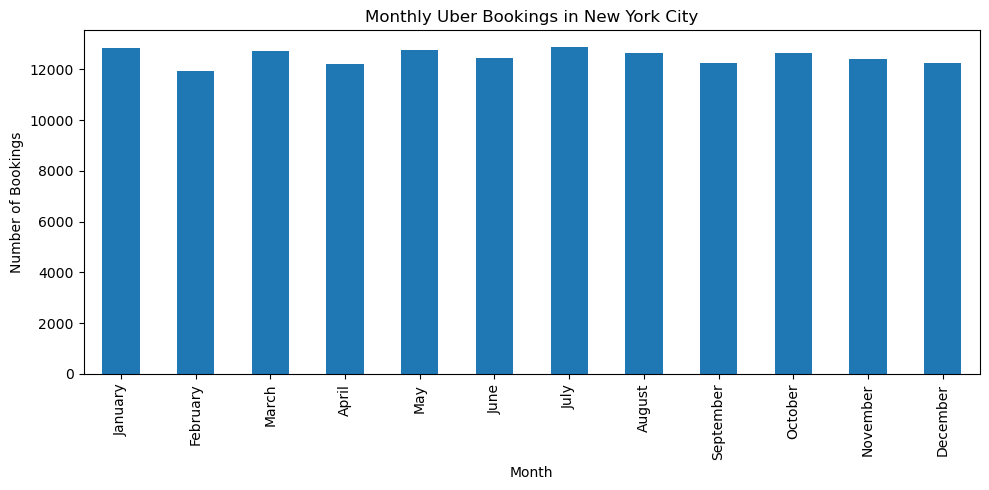

In [23]:
monthly_booking_counts.plot(
    kind="bar", figsize=(10, 5), title="Monthly Uber Bookings in New York City", rot=90
)
plt.ylabel("Number of Bookings")
plt.tight_layout()
plt.show()

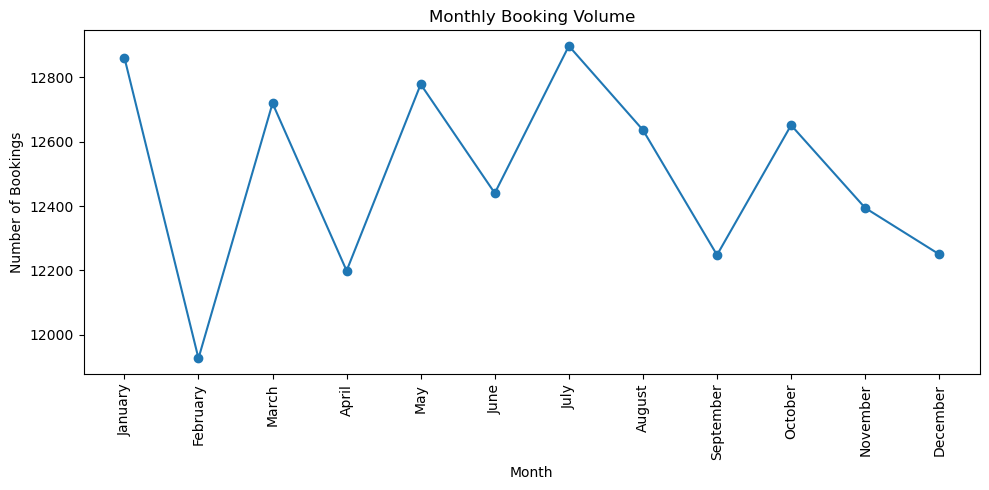

In [24]:
monthly_booking_counts.plot(
    kind="line", figsize=(10, 5), title="Monthly Booking Volume", marker="o", rot=90
)

plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.xticks(
    ticks=range(len(monthly_booking_counts)), labels=monthly_booking_counts.index
)
plt.tight_layout()
plt.show()

In [25]:
# Find the month with the highest number of bookings
monthly_booking_counts.idxmax()

'July'

# 1.2 Booking Results Distribution (Completed vs Cancelled vs Incomplete)

In [26]:
uber_2024["Booking Status"].value_counts()

Booking Status
Completed                93000
Cancelled by Driver      27000
No Driver Found          10500
Cancelled by Customer    10500
Incomplete                9000
Name: count, dtype: int64

In [27]:
def find_booking_result(row):
    match row["Booking Status"]:
        case "Incomplete":
            return "Incomplete"
        case "Cancelled by Driver" | "Cancelled by Customer":
            return "Cancelled"
        case _:
            return "Completed"

In [28]:
uber_2024["Booking_Status"] = uber_2024.apply(find_booking_result, axis=1)

In [29]:
booking_result_counts = uber_2024["Booking_Status"].value_counts(dropna=False)
booking_result_counts

Booking_Status
Completed     103500
Cancelled      37500
Incomplete      9000
Name: count, dtype: int64

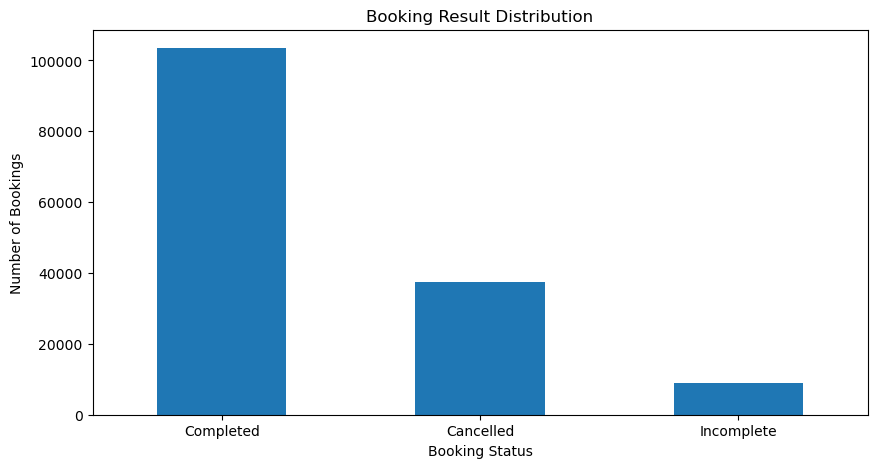

In [30]:
booking_result_counts.plot(
    kind="bar", figsize=(10, 5), title="Booking Result Distribution", rot=0
)
plt.xlabel("Booking Status")
plt.ylabel("Number of Bookings")
plt.show()

# 1.3 Bookings by Weekday Across Months

In [31]:
pivot = pd.crosstab(index=uber_2024["Month"], columns=uber_2024["Weekday"])
pivot.style.set_caption("Uber Bookings by Weekday Across Months in New York City")

Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Month,,,,,,,
January,1685,1991,1657,1729,1675,2062,2062
February,1677,1685,1614,1666,2059,1669,1557
March,2011,1655,2106,2077,1608,1644,1618
April,1639,2097,1592,1631,1592,2020,1628
May,2065,1673,1658,1625,2021,1649,2087
June,1651,1661,2134,2053,1611,1674,1656
July,1700,2055,1639,1648,1675,2071,2109
August,2022,1547,2070,1629,2007,1650,1711
September,1636,2009,1659,1957,1695,1610,1682


<Axes: xlabel='Month'>

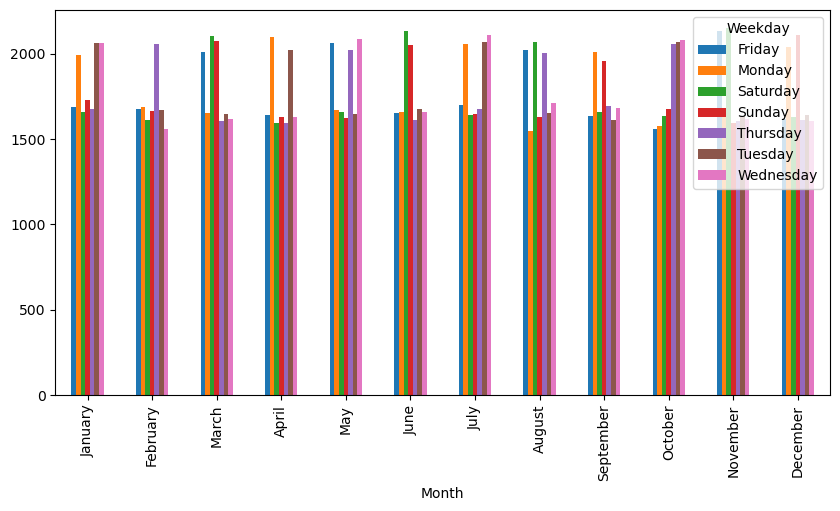

In [32]:
pivot.plot(kind="bar", figsize=(10, 5))

In [33]:
uber_2024["Is_Weekend"] = uber_2024["Date"].dt.weekday.isin([5, 6])

In [34]:
# Compare between Weekdays and Weekends

In [35]:
weekpart_counts = uber_2024.groupby("Is_Weekend")["Booking ID"].count()

In [36]:
weekpart_counts.index = ["Weekday", "Weekend"]

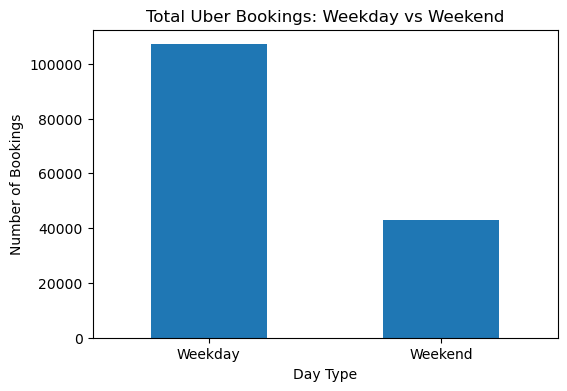

In [37]:
weekpart_counts.plot(
    kind="bar", title="Total Uber Bookings: Weekday vs Weekend", figsize=(6, 4), rot=0
)
plt.xlabel("Day Type")
plt.ylabel("Number of Bookings")
plt.show()

# 1.4 Hourly Demand Patterns

In [38]:
hourly_weekday_counts = (
    uber_2024.groupby(["Weekday", "Hour"])["Booking ID"].count().unstack()
)

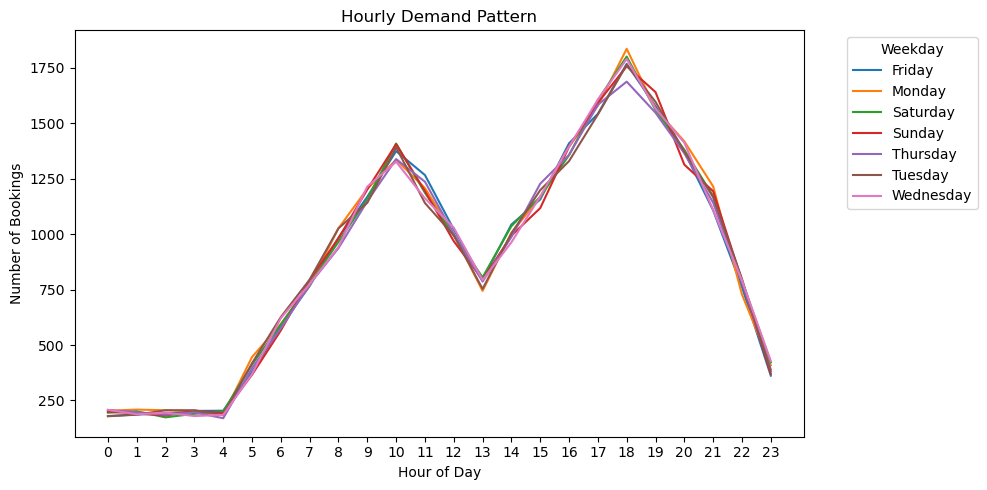

In [39]:
hourly_weekday_counts.T.plot(figsize=(10, 5), title="Hourly Demand Pattern")

plt.xlabel("Hour of Day")
plt.ylabel("Number of Bookings")
plt.xticks(range(24))
plt.legend(title="Weekday", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Section 2. Booking Cancellation Analysis
- Top cancellation reasons
- Customer and Driver cancellations
- Relationship between wait time and cancellations
- Impact of cancellations on ratings

# 2.1 Top cancellation reasons by Customers

In [40]:
cancel_reason_counts = (
    uber_2024["Reason for cancelling by Customer"].dropna().value_counts()
)

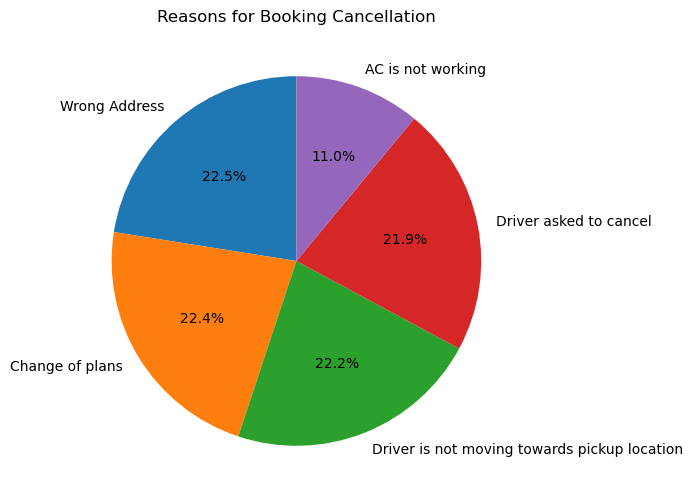

In [41]:
cancel_reason_counts.plot(
    kind="pie",
    title="Reasons for Booking Cancellation",
    figsize=(6, 6),
    autopct="%1.1f%%",
    startangle=90,
)
plt.ylabel("")
plt.show()

# 2.2 Customer vs Driver cancellations

In [42]:
cancelled_by_counts = (
    uber_2024["Booking Status"]
    .value_counts()
    .loc[["Cancelled by Customer", "Cancelled by Driver"]]
)

In [43]:
cancelled_by_counts

Booking Status
Cancelled by Customer    10500
Cancelled by Driver      27000
Name: count, dtype: int64

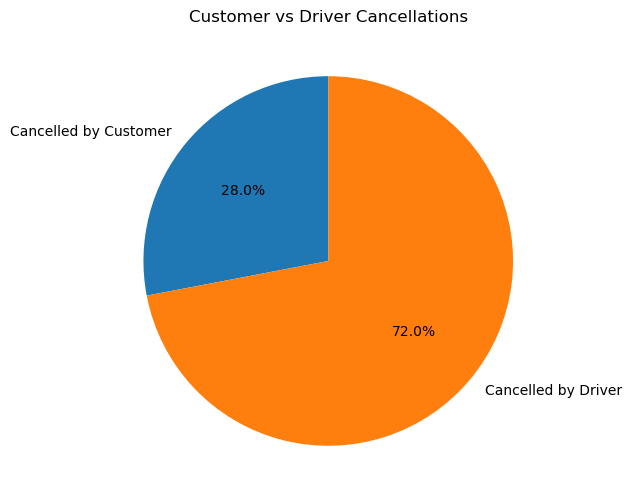

In [44]:
cancelled_by_counts.plot(
    kind="pie",
    title="Customer vs Driver Cancellations",
    autopct="%1.1f%%",
    startangle=90,
    figsize=(6, 6),
)
plt.ylabel("")
plt.show()

# Data Visualization

# Find the pickup location with the highest number of incomplete orders

In [45]:
uber_2024.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method', 'Month',
       'Weekday', 'Hour', 'Booking_Status', 'Is_Weekend'],
      dtype='object')

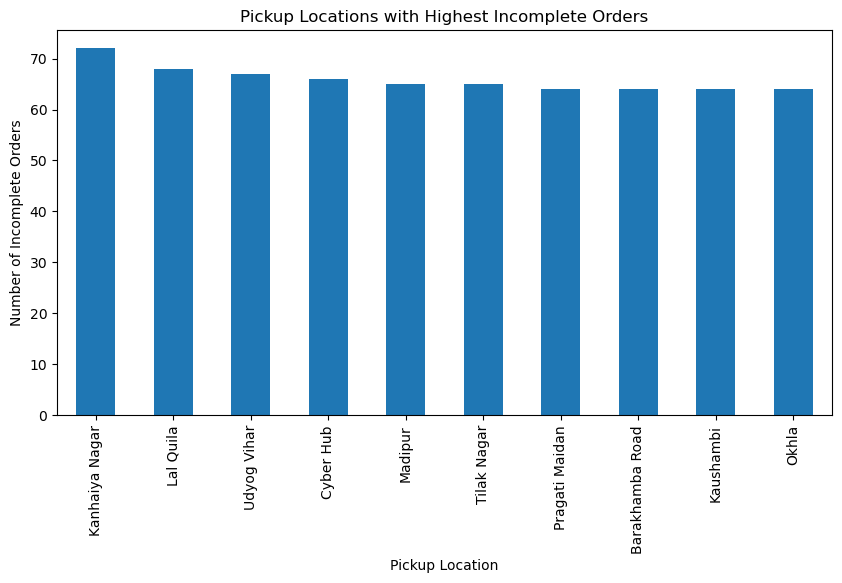

In [46]:
incomplete = uber_2024[uber_2024["Booking Status"] == "Incomplete"]

location_counts = incomplete["Pickup Location"].value_counts().head(10)

location_counts.plot(kind="bar", figsize=(10, 5))
plt.ylabel("Number of Incomplete Orders")
plt.xlabel("Pickup Location")
plt.title("Pickup Locations with Highest Incomplete Orders")
plt.show()

# Find the hourly rush in New York City across all days

In [47]:
summary = uber_2024.groupby(["Weekday", "Hour"], as_index=False).size()

In [48]:
summary.head(10)

,Weekday,Hour,size
0,Friday,0,180
1,Friday,1,187
2,Friday,2,190
3,Friday,3,203
4,Friday,4,204
5,Friday,5,379
6,Friday,6,585
7,Friday,7,766
8,Friday,8,984
9,Friday,9,1168


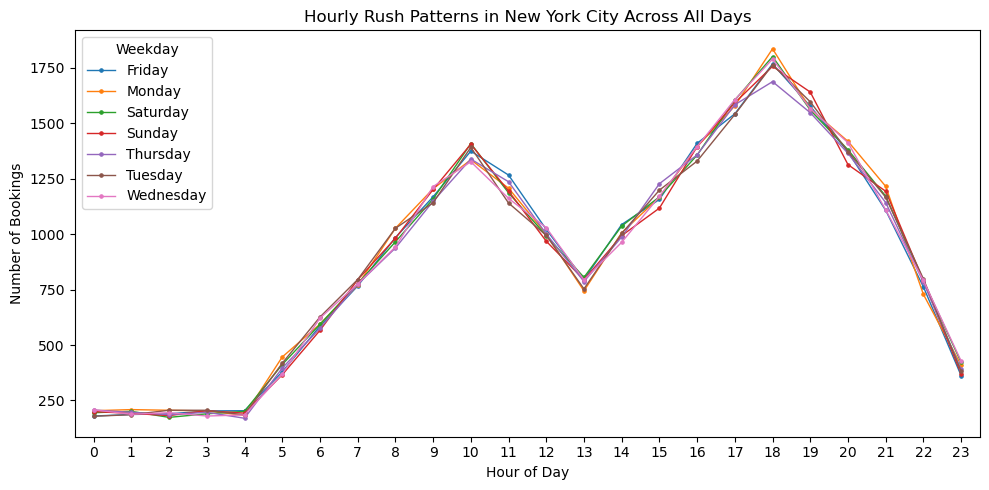

In [49]:
plt.figure(figsize=(10, 5))
sns.pointplot(x="Hour", y="size", hue="Weekday", data=summary, linewidth=1)

plt.title("Hourly Rush Patterns in New York City Across All Days")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Bookings")
plt.tight_layout()
plt.show()

# Find the vehicle type with the longest average ride distance

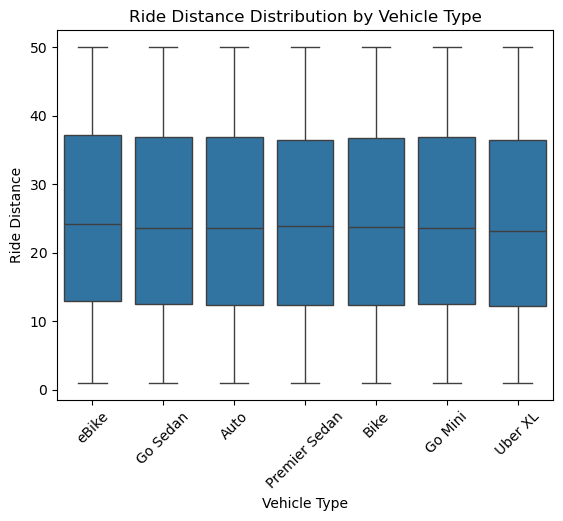

In [50]:
sns.boxplot(x="Vehicle Type", y="Ride Distance", data=uber_2024)
plt.xticks(rotation=45)
plt.title("Ride Distance Distribution by Vehicle Type")
plt.show()

# Find the relationship between ride distance and booking value

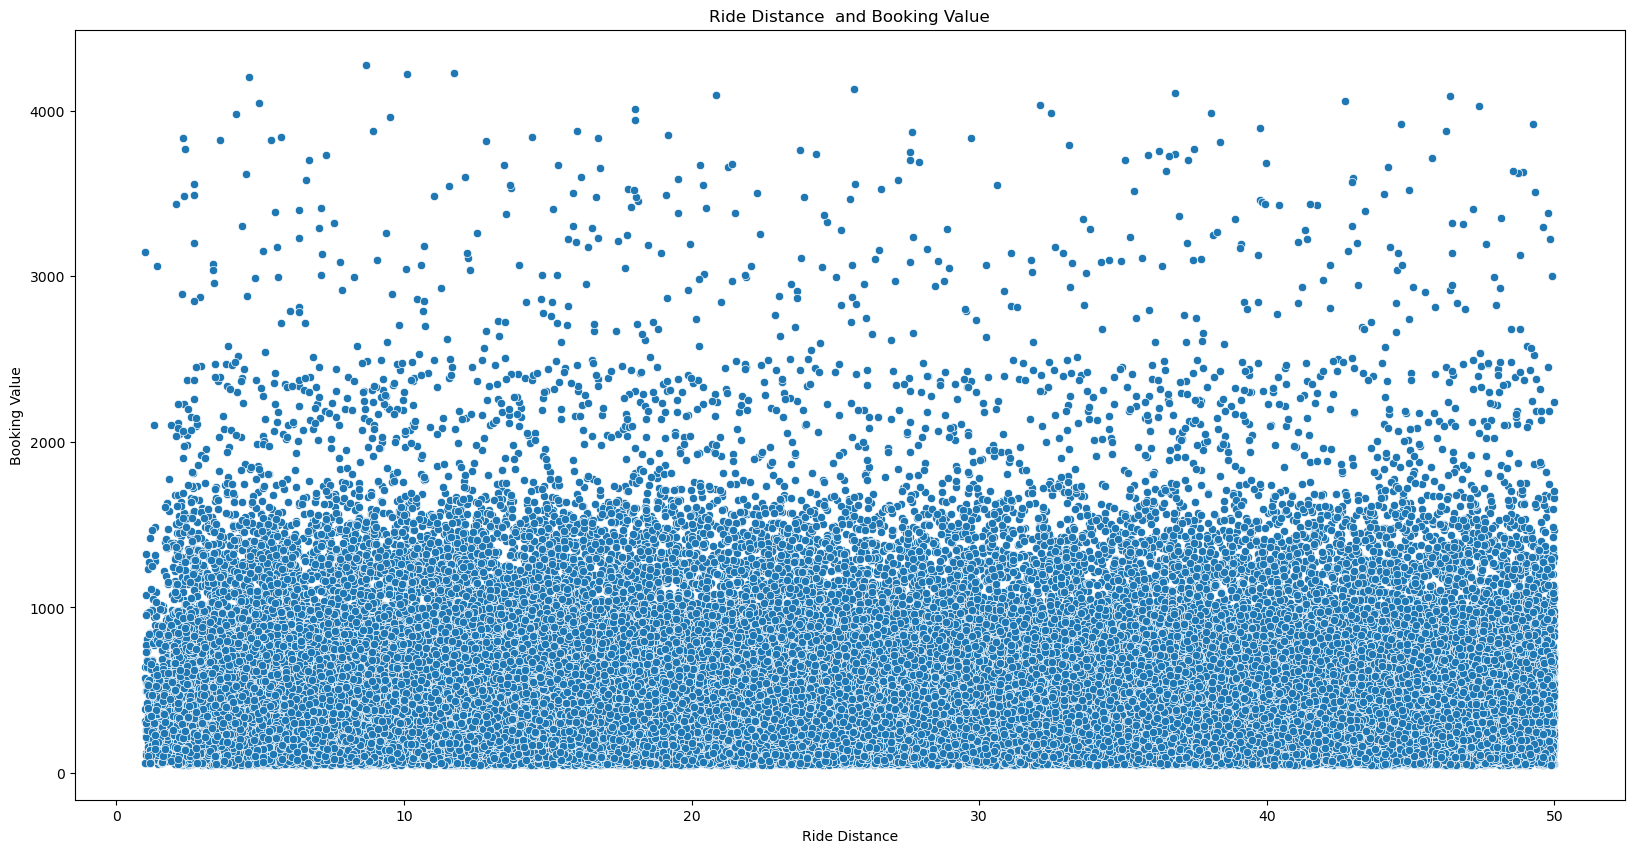

In [51]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x="Ride Distance", y="Booking Value", data=uber_2024)
plt.title("Ride Distance  and Booking Value")
plt.show()